In [1]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.sandbox.stats.runs import runstest_2samp

# --- Configuration ---
n_iterations = 100  # Number of simulation runs
n_sample = 50       # Sample size for each group (n1=50, n2=50)
alpha = 0.05        # Significance level
critical_z = -1.645 # One-tailed critical Z-value for alpha=0.05

# Lists to store results
z_scores_h0 = []
p_values_h0 = []
z_scores_ha = []
p_values_ha = []

# --- Simulation Loop ---
for _ in range(n_iterations):
    # --- Scenario 1: H0 is True (Same Distribution) ---
    # Both samples from N(mean=10, std=2)
    sample_A_h0 = np.random.normal(loc=10, scale=2, size=n_sample)
    sample_B_h0 = np.random.normal(loc=10, scale=2, size=n_sample)

    z_h0, p_h0 = runstest_2samp(x=sample_A_h0, y=sample_B_h0, correction=True)
    z_scores_h0.append(z_h0)
    # Use one-sided p-value for hypothesis testing
    p_values_h0.append(p_h0 / 2)


    # --- Scenario 2: HA is True (Different Distributions) ---
    # Sample A from N(mean=10, std=2)
    # Sample B from N(mean=14, std=2) -> A clear shift in location
    sample_A_ha = np.random.normal(loc=10, scale=2, size=n_sample)
    sample_B_ha = np.random.normal(loc=13, scale=2, size=n_sample)

    z_ha, p_ha = runstest_2samp(x=sample_A_ha, y=sample_B_ha, correction=True)
    z_scores_ha.append(z_ha)
    p_values_ha.append(p_ha / 2)



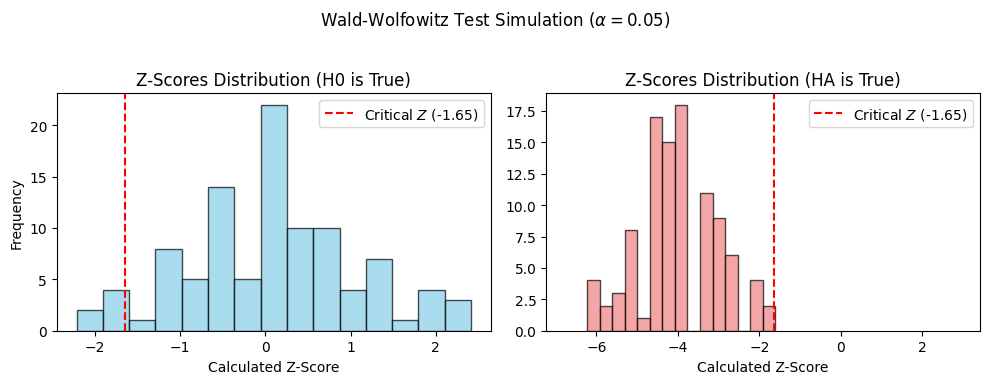


--- Simulation Summary ---
H0 True (Same Dist.): 4/100 rejections (4.00% Type I Error)
HA True (Different Dist.): 99/100 rejections (99.00% Power)


In [5]:
# --- 3. Visualization ---
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
fig.suptitle("Wald-Wolfowitz Test Simulation ($\\alpha=0.05$)")

# --- Z-Score Histogram (H0 True) ---
axes[0].hist(z_scores_h0, bins=15, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].axvline(critical_z, color='red', linestyle='--', label=f'Critical $Z$ ({critical_z:.2f})')
axes[0].set_title('Z-Scores Distribution (H0 is True)')
axes[0].set_xlabel('Calculated Z-Score')
axes[0].set_ylabel('Frequency')
axes[0].legend()
# --- Z-Score Histogram (HA True) ---
axes[1].hist(z_scores_ha, bins=15, color='lightcoral', edgecolor='black', alpha=0.7)
axes[1].axvline(critical_z, color='red', linestyle='--', label=f'Critical $Z$ ({critical_z:.2f})')
axes[1].set_title('Z-Scores Distribution (HA is True)')
axes[1].set_xlabel('Calculated Z-Score')
axes[1].set_xlim(min(z_scores_ha) - 1, max(z_scores_h0) + 1) # Ensure same scale for comparison
axes[1].legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# --- Summary Statistics ---
rejection_h0 = np.sum(np.array(z_scores_h0) < critical_z)
rejection_ha = np.sum(np.array(z_scores_ha) < critical_z)

print("\n--- Simulation Summary ---")
print(f"H0 True (Same Dist.): {rejection_h0}/{n_iterations} rejections ({rejection_h0/n_iterations:.2%} Type I Error)")
print(f"HA True (Different Dist.): {rejection_ha}/{n_iterations} rejections ({rejection_ha/n_iterations:.2%} Power)")